# Project Proposal

## How Horsepower Varies Based on the Numbers of Cylinders in a Car Engine
 **Authors** Group 14: Sid Ahuja, Tejasvi Kathuria, Xiaoran Fan, Ci Xu

## Introduction


There are many factors that determine the performance of a car. Previous research demonstrates that the engine efficieny is related to the volume and number of the cylinders (Emiroğlu et al., 2018). However, there are few and limited studies on the relationship between the number of cylinders and horsepower. In general, cars with different number of cylinders have different horsepower (Kellermayr et al., 2019). We are interested in the different effects on horsepower between the cars with 4- and 6-cylinder engines. Our question is: "Do cars with 6-cylinder engines have higher horsepowers than cars with 4-cylinder engines?" We will answer this question by analysing the sample mean (the location statistics) and the standard deviation (the scale statistics) of the horsepower and how it differs with the number of cylinders in the samples.

Based on our question, our competeing hypotheses are (where μ represents the average horsepower):
- Null Hypothesis: There is no difference in horsepower between 4- and 6-cylinder engines (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> = 0)
- Alternative Hypothesis: 6-cylinder engines have a greater horsepower than 4-cylinder engines (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> > 0)

Our data set is the Auto MPG data set, which was obtained from Carnegie Mellon University's StatLib library. The 1983 American Statistical Association Exposition made use of this dataset. 

Attribute informations:

|Variables|Attribute|
|:---:|:---:|
|mpg|continuous|
|cylinders|multi-valued discrete|
|displacement|continuous|
|horsepower|continuous|
|weight|continuous|
|acceleration|continuous|
|model year|multi-valued discrete|
|origin|multi-valued discrete|
|car name|string (unique for each instance)|



## Preliminary Results


### Loading Required Packages and Setting Seed

In [14]:
library(tidyverse)
library(infer)
library(repr)
library(cowplot)
library(datateachr)
library(digest)
library(dplyr)
set.seed(1234)

### Loading The Data

In [15]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", 
              "auto-mpg.data")

In [16]:
cars <- read.table("auto-mpg.data") 
head(cars)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


### Cleaning and Wrangling The Data

Renaming the variables and cleaning the data. The variable of horsepower is changed into a numeric variable, and the variable of the number of cylinders is changed into a categorical variable. Then, we delete the null values in the "mpg", "horsepower" and "acceleration" columns.

In [17]:
cars <- read.table("auto-mpg.data")%>%
    rename(mpg = V1,
           cylinders = V2,
           dispacement = V3,
           horsepower = V4,
           weight = V5,
           acceleration = V6,
           model = V7,
           origin = V8,
           name = V9) %>%
    mutate(horsepower = as.numeric(horsepower),
           cylinders = as.factor(cylinders))%>%
    filter(!is.na(mpg),
           !is.na(horsepower),
           !is.na(acceleration),
           cylinders %in% c(6,4))
head(cars)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,mpg,cylinders,dispacement,horsepower,weight,acceleration,model,origin,name
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,24,4,113,95,2372,15.0,70,3,toyota corona mark ii
2,22,6,198,95,2833,15.5,70,1,plymouth duster
3,18,6,199,97,2774,15.5,70,1,amc hornet
4,21,6,200,85,2587,16.0,70,1,ford maverick
5,27,4,97,88,2130,14.5,70,3,datsun pl510
6,26,4,97,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan


Selecting the columns relevant to our study and calculating the statistics we will use.

In [18]:
cars_variables <- cars %>% 
    select(cylinders, horsepower)
cars_summ_hp <- cars %>%
    group_by(cylinders) %>%
    summarize(size = n(),
              mean = mean(horsepower),
              sd = sd(horsepower),
              minimum = min(horsepower),
              lower_quartile = quantile(horsepower, 0.25),
              median = median(horsepower),
              upper_quartile = quantile(horsepower, 0.75),
              max = max(horsepower))
head(cars_variables)
cars_summ_hp

,cylinders,horsepower
,<fct>,<dbl>
1,4,95
2,6,95
3,6,97
4,6,85
5,4,88
6,4,46


cylinders,size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,199,78.28141,14.52310,46,68.0,78,88,115
6,83,101.50602,14.31047,72,92.5,100,110,165


### Plotting The Relevant Data

### Boxplot of The Cylinders and The Horsepower

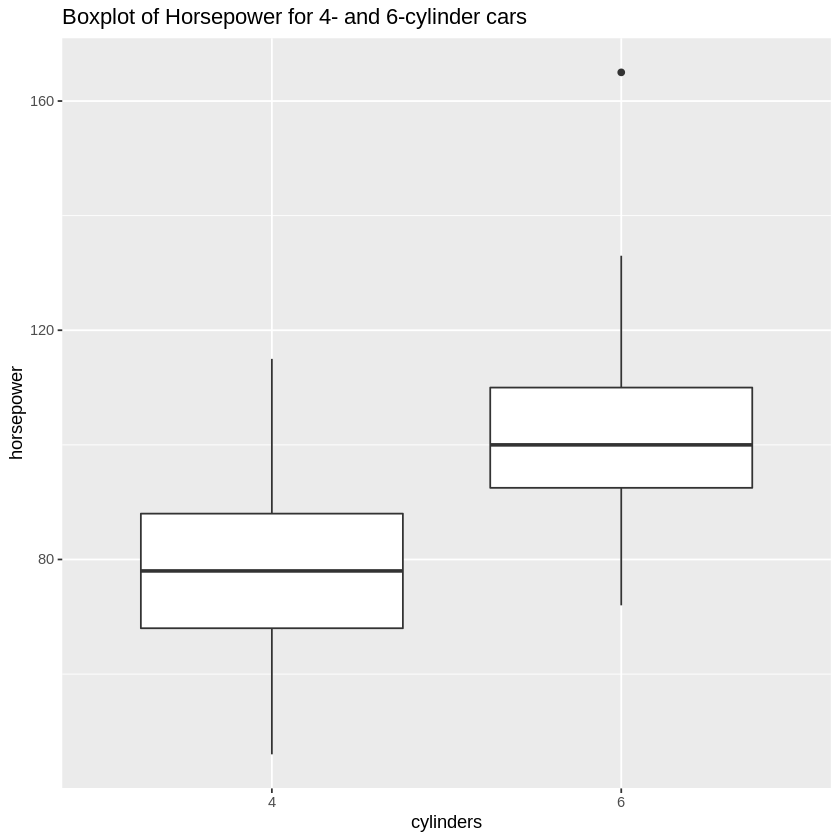

In [19]:
cars_boxplot <- cars %>%
    ggplot(aes(x= cylinders, y = horsepower)) +
    geom_boxplot()+
    ggtitle("Boxplot of Horsepower for 4- and 6-cylinder cars")
cars_boxplot

Here, we can see that that the standard deviation of horsepower for 4 cylinders is similar to the standard deviation of horsepower for 6 cylinders. We can also see that the sample's average horsepower of 6 cylinder engines is greater than the average horsepower of 6 cylinder engines which suggests a differnce; however, the overlap between the boxplots is of some concern and requires further testing. 

### Bootstrap Sampling Distribution

**4 cylinder cars** <br>
- Sample mean marked in red
- 90% confidence interval boundaries marked in blue

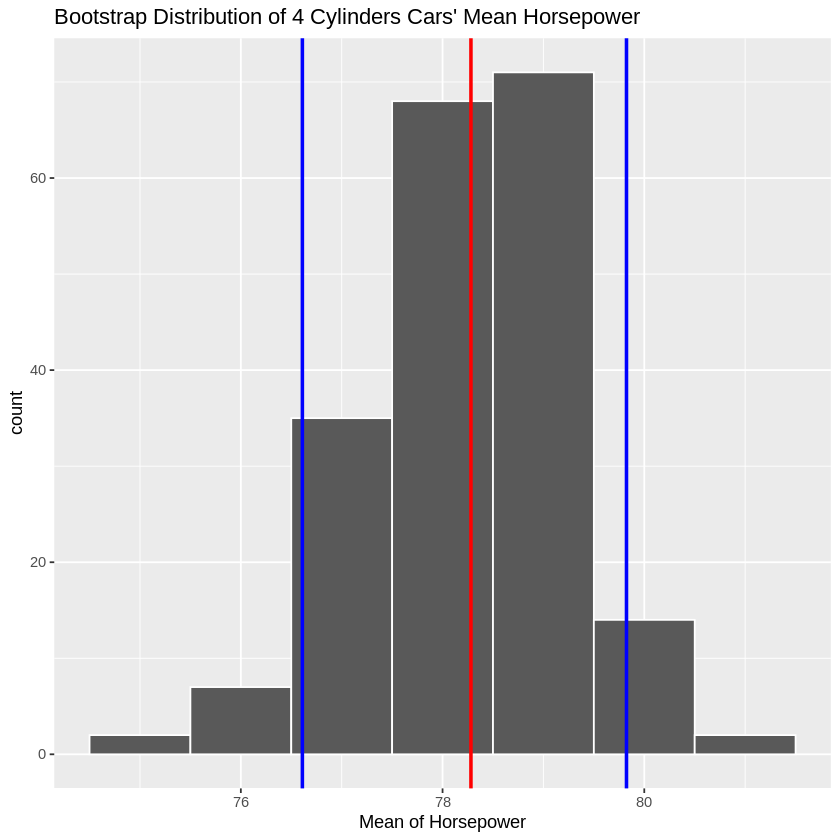

In [23]:
cars_bootstrapped1 <- cars %>%
    filter(cylinders == "4") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 199) %>%
    calculate(stat = "mean")

cars_ci1 <- cars_bootstrapped1 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

cars_4cylinders_plot <- cars_bootstrapped1 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_ci1[[1]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_ci1[[2]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_summ_hp[[1,3]], color = "red", size = 1) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 4 Cylinders Cars' Mean Horsepower")

cars_4cylinders_plot

**6 cylinder cars**

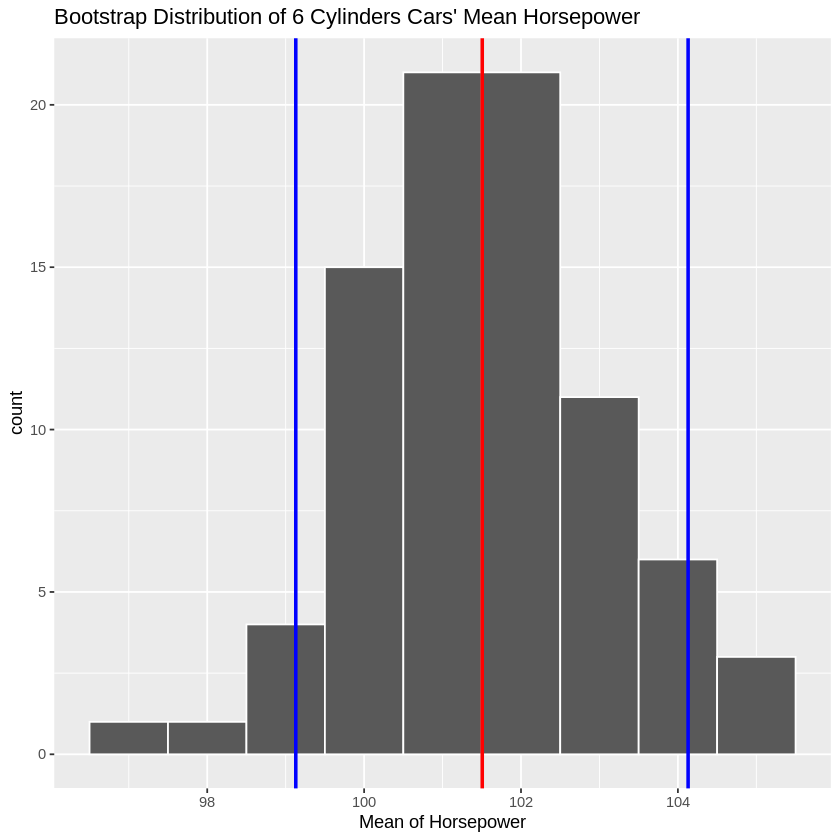

In [24]:
cars_bootstrapped2 <- cars %>%
    filter(cylinders == "6") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 83) %>%
    calculate(stat = "mean")

cars_ci2 <- cars_bootstrapped2 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

cars_6cylinders_plot <- cars_bootstrapped2 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_ci2[[1]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_ci2[[2]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_summ_hp[[2,3]], color = "red", size = 1) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 6 Cylinders Cars' Mean Horsepower")

cars_6cylinders_plot

## Method : Plan

## Reference

Emiroğlu, A. O., & Şen, M. (2018). Combustion, performance and emission characteristics of various alcohol blends in a single cylinder diesel engine. Fuel, 212, 34–40. https://doi.org/10.1016/j.fuel.2017.10.016 

Kellermayr, G., Schutting, E., &amp; Mitterecker, H. (2019). Turbocharging of engines with low cylinder numbers: A thermodynamic consideration. Automotive and Engine Technology, 4(3-4), 153–167. https://doi.org/10.1007/s41104-019-00048-8 